# Gradient Boosting Regression - Sklearn

In [1]:
import pandas as pd

In [2]:
print(pd.__version__)


0.25.1


In [3]:
# Reading Automobile data wiht pandas library
auto_data = pd.read_csv(r"C:\KD_Doc\ML work\Lab_Home_work\Automobile_data.csv")

In [4]:
auto_data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
# In orginal data missing value is represted wiht "?" so -  
# Replacing "?" with "nan" value
import numpy as np
auto_data = auto_data.replace('?',np.nan)
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Basic EDA process

In [6]:
# quick overview of data
auto_data.describe(include="all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201,201,205.000000,203,203,205.000000,205.000000,201
unique,NaN,51,22,2,2,2,5,3,2,NaN,...,NaN,8,38,36,NaN,59,23,NaN,NaN,186
top,NaN,161,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,8845
freq,NaN,11,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,2
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [7]:
# Examin traget variable
auto_data["price"].describe()

count      201
unique     186
top       8845
freq         2
Name: price, dtype: object

It shows target variable dtype is "object" so we have to convert in appropriate format.

In [8]:
# Converting traget column into appropriate
auto_data["price"] = auto_data["price"].astype("float")

In [9]:
auto_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [10]:
# Removing unnecessary columns
auto_data = auto_data.drop(["normalized-losses"],axis=1)

In [11]:
auto_data.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [12]:
# Converting traget column into appropriate
auto_data["horsepower"] = auto_data["horsepower"].astype("float")
auto_data["horsepower"].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [13]:
auto_data["num-of-cylinders"].describe()

count      205
unique       7
top       four
freq       159
Name: num-of-cylinders, dtype: object

In [14]:
auto_data["num-of-cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [15]:
# Encoding of categorical value into numeric value
cylinders_dict = {"four" : 4,
                 "six" : 6,
                 "five" : 5,
                 "eight" : 8,
                 "two" : 2,
                 "twelve" : 12,
                 "three" : 3}
auto_data["num-of-cylinders"].replace(cylinders_dict,inplace=True)
auto_data["num-of-cylinders"].describe()

count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: num-of-cylinders, dtype: float64

In [16]:
print(auto_data["num-of-cylinders"].value_counts())
auto_data.head()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102.0,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115.0,5500,18,22,17450.0


In [17]:
auto_data.dtypes

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [18]:
# using one-hot encoding method to coverting categorical value into numerical value
auto_data = pd.get_dummies(auto_data,columns=["make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location",
                                             "engine-type","fuel-system"])
auto_data.head()

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# shape of data before droping NA value
auto_data.shape

(205, 69)

In [20]:
# droping all the rows which has NA value
auto_data = auto_data.dropna()
print(auto_data.shape)

(195, 69)


In [21]:
# Checking is there any null value available in dataframe
auto_data.isnull().sum()

symboling           0
wheel-base          0
length              0
width               0
height              0
                   ..
fuel-system_idi     0
fuel-system_mfi     0
fuel-system_mpfi    0
fuel-system_spdi    0
fuel-system_spfi    0
Length: 69, dtype: int64

# Gradient Boosting Regression

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
params = {"n_estimators":500,"max_depth" :6,"min_samples_split" : 2,
         "learning_rate" :0.01,"loss":"ls"}
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
# R square value of model
gbr_model.score(X_train,y_train)

0.9983862634096469

In [58]:
# Predicting over test data
y_predict = gbr_model.predict(X_test)

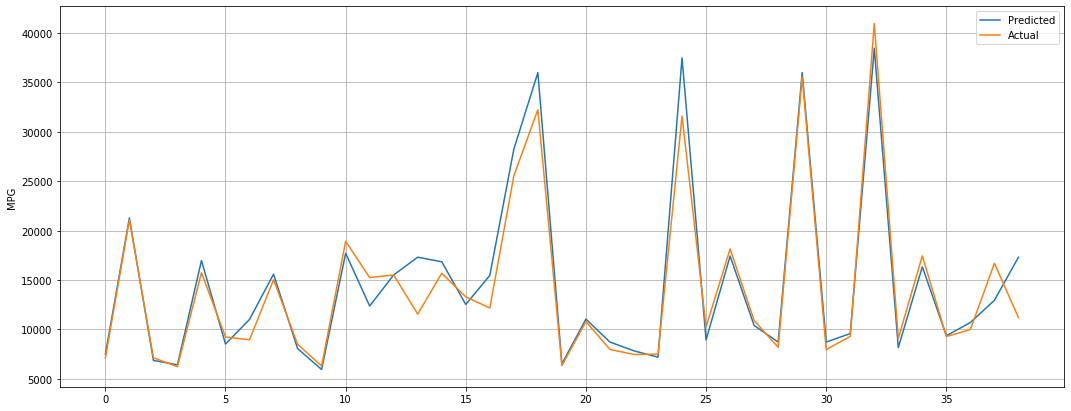

In [59]:
# Visalization of model
plt.figure(figsize=(18,7))
plt.plot(y_predict,label = "Predicted")
plt.plot(y_test.values,label = "Actual")
plt.legend()
plt.ylabel("MPG")
plt.grid(True)
plt.show()

Model performing very well as we can see in graph

In [61]:
# Calculating R square value for test data
print("R square value for test data : ",gbr_model.score(X_test,y_test))

R square value for test data :  0.933700731233932


# Performance matrix of model

In [64]:
from sklearn.metrics import mean_squared_error
print("MSE of the model : ",mean_squared_error(y_predict,y_test))
print("\n")
print("RMSE of the model : ",math.sqrt(mean_squared_error(y_predict,y_test)))

MSE of the model :  4705495.661252125


RMSE of the model :  2169.215448325068


# GRID Search method to find best parameter

In [66]:
from sklearn.model_selection import GridSearchCV

In [68]:
num_estimators = [100,200,500]
learn_rates = [0.01,0.02,0.05,0.1]
max_depths = [4,6,8]

param_grid = {"n_estimators":num_estimators,
             "learning_rate" : learn_rates,
             "max_depth":max_depths}
grid_serach  = GridSearchCV(GradientBoostingRegressor(min_samples_split = 2,loss = "ls"),
                                                     param_grid,cv = 3,return_train_score = True)

grid_serach.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [69]:
grid_serach.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}

 These are the best parameter for our model

In [70]:
grid_serach.cv_results_

{'mean_fit_time': array([0.05494912, 0.10123261, 0.25178281, 0.06231896, 0.13318427,
        0.3788859 , 0.13726489, 0.22834762, 0.52843833, 0.06100241,
        0.11698747, 0.28698635, 0.08633327, 0.15988851, 0.38631852,
        0.09833185, 0.195026  , 0.49366442, 0.05966449, 0.11632975,
        0.28966633, 0.08032878, 0.1643424 , 0.38351973, 0.09935951,
        0.19733779, 0.46133709, 0.05866742, 0.11833127, 0.28799637,
        0.07932663, 0.18935569, 0.41033363, 0.10035308, 0.18531974,
        0.41700069]),
 'std_fit_time': array([0.01556   , 0.00067616, 0.00478142, 0.00104853, 0.00167046,
        0.04001198, 0.02061688, 0.00521078, 0.02557271, 0.00162918,
        0.00214449, 0.00375037, 0.00739733, 0.00164871, 0.00572394,
        0.00207647, 0.00450294, 0.01861541, 0.00309749, 0.00203766,
        0.00531231, 0.00168516, 0.00940624, 0.00489589, 0.00172448,
        0.00308269, 0.01388648, 0.00094493, 0.00124624, 0.00218488,
        0.0012189 , 0.02006158, 0.00533836, 0.0028994 , 0.003

# Model with best parameter

In [79]:
params = {"n_estimators":200,
             "min_samples_split" : 2,
             "max_depth":4,"learning_rate" : 0.1,"loss" : "ls"}
gbr_model  = GradientBoostingRegressor(**params)
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
# Predictive over test data
y_predicted = gbr_model.predict(X_test)

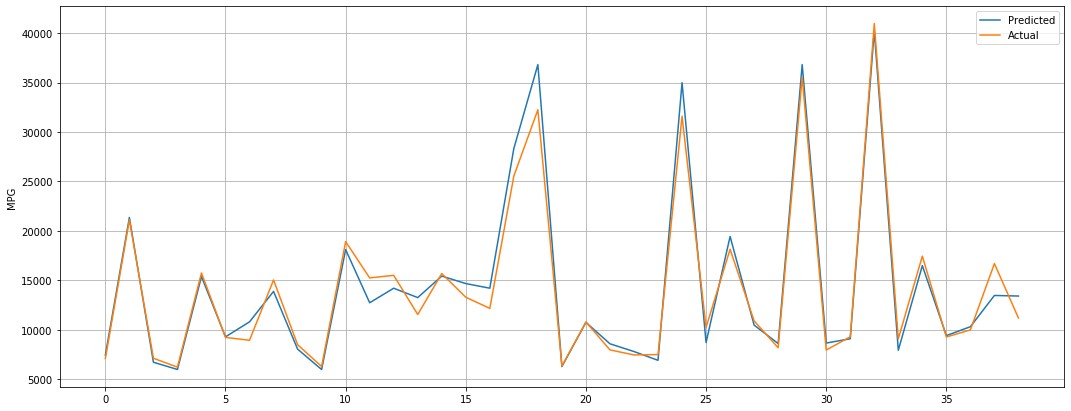

In [81]:
# Visualization of actual vs Predicted over test data
plt.figure(figsize=(18,7))
plt.plot(y_predicted,label = "Predicted")
plt.plot(y_test.values,label = "Actual")
plt.legend()
plt.grid(True)
plt.ylabel("MPG")
plt.show()

Visually we can see our best parameter give bettter result

In [84]:
# Calculting R square on test data
print("R square on test data is :" ,gbr_model.score(X_test,y_test))

R square on test data is : 0.9678855486816793


In [86]:
# Performance matrices MSE and RMSE
from sklearn.metrics import mean_squared_error
print("MSE of model : ",mean_squared_error(y_predicted,y_test))
print("\n")
print("RMSE of model : ",math.sqrt(mean_squared_error(y_predicted,y_test)))

MSE of model :  2279277.194972485


RMSE of model :  1509.7275234201982
